In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data downloaded from github 
df=pd.read_csv("https://raw.githubusercontent.com/ajeetsingh55555/pythonfiles/main/Data_Train.csv")

In [3]:
df.columns
#checking the column names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<AxesSubplot:>

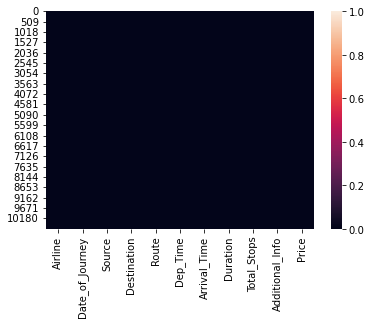

In [4]:
sns.heatmap(df.isnull())
#checking the null values using heatmap,showing there are many in outlet size and item weight , so to check this in values we will use below command

In [5]:
df.isnull().sum()
# checking the count of null values, there are no nulls

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
#using simple imputer strategy mean to replacce NAN values with mean ,we will use mode for total stops as well as there are values like non stop
import numpy as np
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Route']=imp.fit_transform(df['Route'].values.reshape(-1,1))
df['Total_Stops']=imp.fit_transform(df['Total_Stops'].values.reshape(-1,1))


In [14]:
df.isnull().sum()
#now there is no NULL value

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
df.dtypes
#we will require encoding to convert oject into float

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We now need to convert object to float as datatype and then we will study the correlation 

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [17]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df.dtypes

Airline            float64
Date_of_Journey    float64
Source             float64
Destination        float64
Route              float64
Dep_Time           float64
Arrival_Time       float64
Duration           float64
Total_Stops        float64
Additional_Info    float64
Price                int64
dtype: object

In [19]:
df.describe()
#The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


<AxesSubplot:>

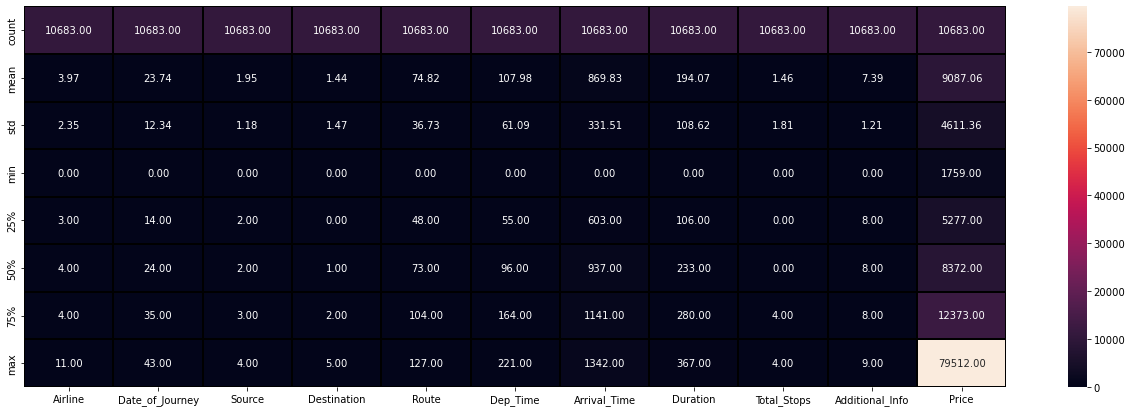

In [20]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [21]:
df.shape
#data has 11 columns and 10683 rows

(10683, 11)

In [22]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025118,-0.039439,-0.015733,0.027917,0.036064,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275181,-0.007836,-0.012507,-0.001168,-0.044152,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403403,0.055191,0.020844,-0.192009,-0.225601,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461183,-0.063608,-0.036830,0.022037,0.337883,0.026806,-0.071112
Route,0.025118,0.275181,0.403403,-0.461183,1.000000,-0.082051,0.010560,-0.062097,-0.437783,0.035188,0.164118
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082051,1.000000,-0.023294,0.041619,0.044687,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010560,-0.023294,1.000000,0.027746,-0.097132,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062097,0.041619,0.027746,1.000000,0.175207,0.080151,-0.144270
Total_Stops,0.036064,-0.044152,-0.225601,0.337883,-0.437783,0.044687,-0.097132,0.175207,1.000000,0.164009,-0.571174
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035188,-0.052853,0.017505,0.080151,0.164009,1.000000,-0.065478


<AxesSubplot:>

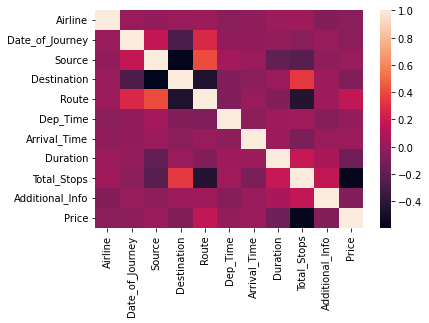

In [23]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [24]:
#Here using diff chart and below table can see very low corr of Dep_Time,Arrival_Time,Date_of_Journey,Airline,Additional_Info,Destination
#so we will drop them
dfcorr["Price"].sort_values(ascending=False)

Price              1.000000
Route              0.164118
Arrival_Time       0.027377
Source             0.015998
Dep_Time           0.002949
Date_of_Journey   -0.036942
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
Total_Stops       -0.571174
Name: Price, dtype: float64

In [25]:
df1=df.drop(['Dep_Time','Arrival_Time','Date_of_Journey','Airline','Additional_Info','Destination'],axis=1)
df1

,Source,Route,Duration,Total_Stops,Price
0,0.0,18.0,240.0,4.0,3897
1,3.0,84.0,336.0,1.0,7662
2,2.0,118.0,106.0,1.0,13882
3,3.0,91.0,311.0,0.0,6218
4,0.0,29.0,303.0,0.0,13302
...,...,...,...,...,...
10678,3.0,64.0,236.0,4.0,4107
10679,3.0,64.0,237.0,4.0,4145
10680,0.0,18.0,280.0,4.0,7229
10681,0.0,18.0,238.0,4.0,12648


In [26]:
df1.columns

Index(['Source', 'Route', 'Duration', 'Total_Stops', 'Price'], dtype='object')

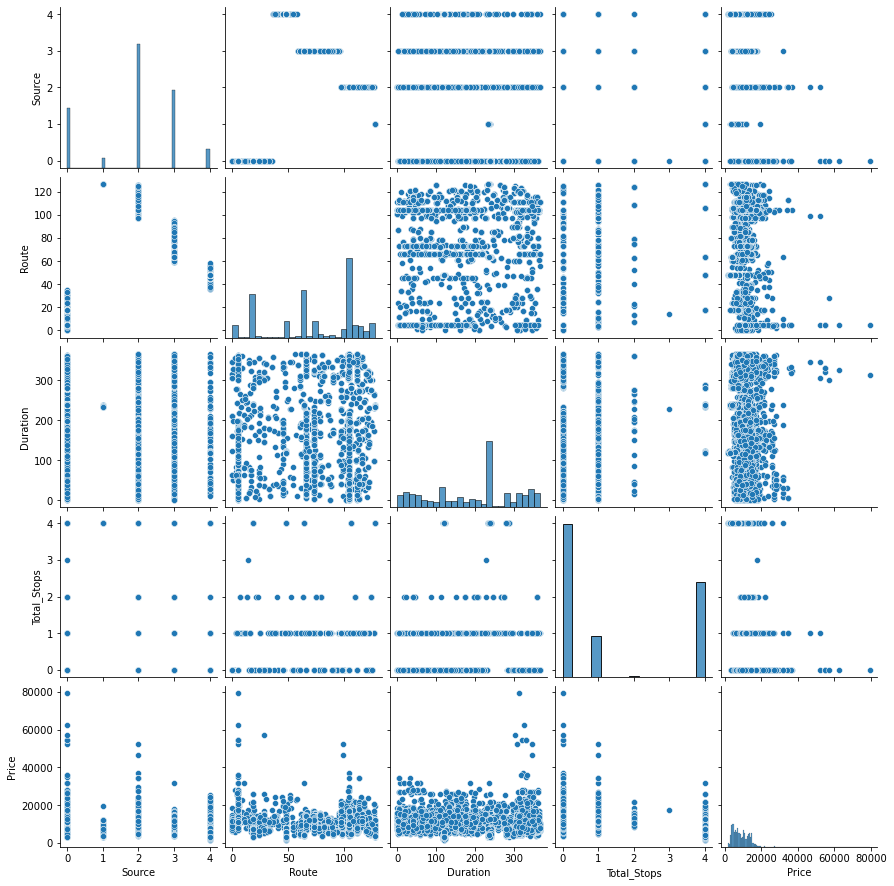

In [27]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

<AxesSubplot:xlabel='Source', ylabel='Density'>

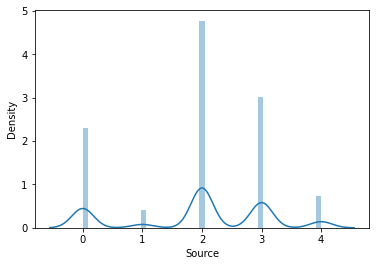

In [28]:
#we will check the data distribution using distplots
sns.distplot(df1['Source'])

<AxesSubplot:xlabel='Route', ylabel='Density'>

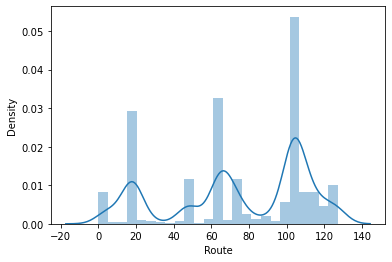

In [29]:
sns.distplot(df1['Route'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

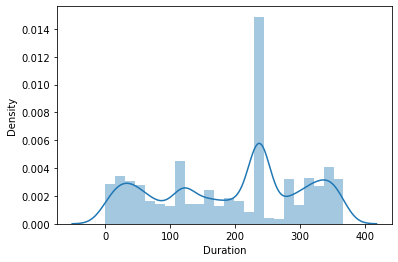

In [30]:
sns.distplot(df1['Duration'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

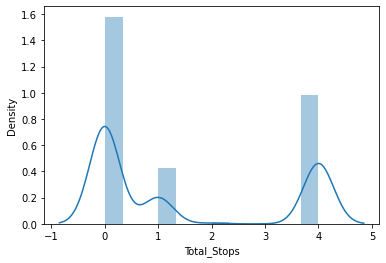

In [31]:
sns.distplot(df1['Total_Stops'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

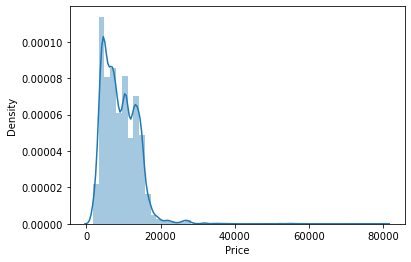

In [32]:
sns.distplot(df1['Price'])

Source            AxesSubplot(0.125,0.536818;0.110714x0.343182)
Route          AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Duration       AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Total_Stops    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Price          AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

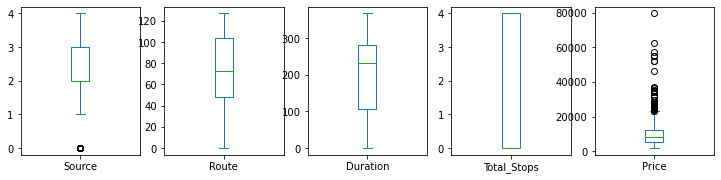

In [33]:
df1.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,6))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

In [34]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Source,Route,Duration,Total_Stops,Price
0,1.658441,1.547183,0.422875,1.407309,1.125548
1,0.890052,0.249876,1.306727,0.253632,0.309048
2,0.040555,1.175633,0.810835,0.253632,1.039858
3,0.890052,0.440473,1.076557,0.807278,0.622202
4,1.658441,1.247673,1.002903,0.807278,0.914076
...,...,...,...,...,...
10678,0.890052,0.294688,0.386047,1.407309,1.080006
10679,0.890052,0.294688,0.395254,1.407309,1.071765
10680,1.658441,1.547183,0.791146,1.407309,0.402951
10681,1.658441,1.547183,0.404461,1.407309,0.772246


In [35]:
z=np.abs(zscore(df1))

In [36]:
z.shape

(10683, 5)

In [37]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   826,
         936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
        1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
        2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
        3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
        5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
        6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
        7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
        8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,  9019,
        9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160, 10182,
       10189, 10353, 10364, 10383, 10439, 10511], dtype=int64), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 

In [38]:
len(np.where(z>3)[0])

96

In [39]:
df2=df1[(z<3).all(axis=1)]

In [40]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (10683, 5)
new dataframe (10587, 5)
total dropped 96


In [41]:
loss_percent=(10683-10587)/10683*100
print(loss_percent,"%")
#here by removing the outliers loosign 0.89% of data which is fine as it will help in gettign better model accuracy

0.8986239820275204 %


In [42]:
#we will now check skewness in data
df2.skew()

Source        -0.437770
Route         -0.510097
Duration      -0.215311
Total_Stops    0.619568
Price          0.412076
dtype: float64

In [43]:
# We will break data into input and output and then remove skewness
x=df2.drop("Price",axis=1)
y=df2["Price"]

In [44]:
x

,Source,Route,Duration,Total_Stops
0,0.0,18.0,240.0,4.0
1,3.0,84.0,336.0,1.0
2,2.0,118.0,106.0,1.0
3,3.0,91.0,311.0,0.0
4,0.0,29.0,303.0,0.0
...,...,...,...,...
10678,3.0,64.0,236.0,4.0
10679,3.0,64.0,237.0,4.0
10680,0.0,18.0,280.0,4.0
10681,0.0,18.0,238.0,4.0


In [45]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10587, dtype: int64

In [46]:
#checking vif to identify multicollinierity and can see below that no column is similarly correlated
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)
#There is no multicollinierity so need to drop any column further

,Variables,VIF Factor
0,Source,4.013455
1,Route,5.132149
2,Duration,3.368817
3,Total_Stops,1.684411


In [47]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [48]:
x1=power_transform(x,method='yeo-johnson')
pd.DataFrame(x1).skew()

0   -0.234880
1   -0.437798
2   -0.390817
3    0.318119
dtype: float64

In [49]:
# as we have now removed the skewness , let form the modekl using Linear Regression as the output is a continues variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [50]:
#finding best random state
from sklearn.metrics import r2_score
maxr2=0
maxRS=0
lr=LinearRegression()
for i in range(0,100):
    x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    lr.fit(x1_train,y_train)
    predlr=lr.predict(x1_test)
    r2score=r2_score(y_test,predlr)
    print('r2score',r2score,'randome state',i)
    if r2score>maxr2:
        maxr2=r2score
        maxRS=i
        
print("Best r2 score is",maxr2,"on Random State",maxRS)


r2score 0.2999591557977035 randome state 0
r2score 0.27721848829069307 randome state 1
r2score 0.26777230661297136 randome state 2
r2score 0.2934974073338329 randome state 3
r2score 0.2630446049360671 randome state 4
r2score 0.27939626662055506 randome state 5
r2score 0.2998472305848592 randome state 6
r2score 0.3118384145592217 randome state 7
r2score 0.29917366204290663 randome state 8
r2score 0.28975326645995614 randome state 9
r2score 0.27563663354884704 randome state 10
r2score 0.2726302163162072 randome state 11
r2score 0.2991339710856077 randome state 12
r2score 0.32361754402681064 randome state 13
r2score 0.2896051906766067 randome state 14
r2score 0.28930696310971193 randome state 15
r2score 0.2763464030593935 randome state 16
r2score 0.27253319051202873 randome state 17
r2score 0.2925768271248623 randome state 18
r2score 0.3043990253460551 randome state 19
r2score 0.30481255745846647 randome state 20
r2score 0.26053829366252446 randome state 21
r2score 0.31054568472531807 ran

In [51]:
#We will go with random state 3,7,17
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=36)
lr.fit(x1_train,y_train)
predlr=lr.predict(x1_test)
print(r2_score(y_test,predlr))
cvscore=cross_val_score(lr,x1,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.333117098948438
cross val score: 0.29314159486383184


In [52]:
#Hypertuning , getting best parameters
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x1_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [53]:
#applying the same parameters
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x1_train,y_train)
ls.score(x1_train,y_train)
pred_ls=ls.predict(x1_test)
lss=r2_score(y_test,pred_ls)
lss
cvscore1=cross_val_score(ls,x1,y,cv=5)
cvm1=cvscore1.mean()
print("accuracy score",lss)
print("cross val score:",cvm1)

accuracy score 0.33311597125570014
cross val score: 0.2931416443980595


In [54]:
#Trying with Ridge regression technique for hypertuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
cl=GridSearchCV(rd,parameters)
cl.fit(x1_train,y_train)
print(cl.best_params_)

{'alpha': 1, 'random_state': 0}


In [55]:
rd=Ridge(alpha=1,random_state=0)
rd.fit(x1_train,y_train)
rd.score(x1_train,y_train)
pred_rd=rd.predict(x1_test)
rdd=r2_score(y_test,pred_rd)
cvscore2=cross_val_score(rd,x1,y,cv=5)
cvm2=cvscore2.mean()
print("accuracy score",rdd)
print("cross val score:",cvm2)

accuracy score 0.33311395993788584
cross val score: 0.2931417107512897


In [56]:
#We will check more models to see if we can still get better result for more improvement
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x1_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [57]:
#Applying the crieterias
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x1_train,y_train)
rf.score(x1_train,y_train)
pred_decision=rf.predict(x1_test)
rfs=r2_score(y_test,pred_decision)
cvs3=cross_val_score(rf,x1,y,cv=5)
cvm3=cvs3.mean()
print("accuracy score",rfs)
print("cross val score:",cvm3)

accuracy score 0.6600300475790348
cross val score: 0.6401617620323095


In [58]:
#above gives better % accuracy and cross val score as well and they are very close to each other
#than previous methods so we will save this model
import pickle

In [59]:
filename='flightprice.pkl'
pickle.dump(rf,open(filename,'wb'))

In [60]:
#Conclusion 
loaded_model=pickle.load(open('flightprice.pkl','rb'))
result=loaded_model.score(x1_test,y_test)
print(result)
                        

0.6600300475790348


Random forest Regressor with mse criteria and log2 as max features gives best score hence we will select this model and save

In [61]:
#predicting the wins using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x1_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117
Predicted,4926.541814,12507.916824,13317.625944,4405.77472,12067.794619,14017.380574,4589.469616,12353.285881,12065.852125,6594.269752,...,12799.092811,10119.725138,4579.901779,3650.706481,10547.227084,13499.376026,8244.065133,6943.756149,5454.586815,11340.811991
Original,4926.541814,12507.916824,13317.625944,4405.77472,12067.794619,14017.380574,4589.469616,12353.285881,12065.852125,6594.269752,...,12799.092811,10119.725138,4579.901779,3650.706481,10547.227084,13499.376026,8244.065133,6943.756149,5454.586815,11340.811991


We now need to apply this model to test data and predict the price , so we will get the test data and remove the columns which are not in our saved model

In [62]:
#test data downloaded from github 
dtest=pd.read_csv("https://raw.githubusercontent.com/ajeetsingh55555/pythonfiles/main/Test_set.csv")

In [63]:
dtest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [64]:
#dropping the columns from test data as input of our model dont have these
dtest1=dtest.drop(["Airline","Date_of_Journey","Destination","Dep_Time","Arrival_Time","Additional_Info"],axis=1)
dtest1

,Source,Route,Duration,Total_Stops
0,Delhi,DEL ? BOM ? COK,10h 55m,1 stop
1,Kolkata,CCU ? MAA ? BLR,4h,1 stop
2,Delhi,DEL ? BOM ? COK,23h 45m,1 stop
3,Delhi,DEL ? BOM ? COK,13h,1 stop
4,Banglore,BLR ? DEL,2h 50m,non-stop
...,...,...,...,...
2666,Kolkata,CCU ? DEL ? BLR,23h 55m,1 stop
2667,Kolkata,CCU ? BLR,2h 35m,non-stop
2668,Delhi,DEL ? BOM ? COK,6h 35m,1 stop
2669,Delhi,DEL ? BOM ? COK,15h 15m,1 stop


In [65]:
#we will now convert all string to float of test data
for i in dtest1.columns:
    if dtest1[i].dtypes=="object":
        dtest1[i]=enc.fit_transform(dtest1[i].values.reshape(-1,1))

In [66]:
dtest1

,Source,Route,Duration,Total_Stops
0,2.0,76.0,10.0,0.0
1,3.0,65.0,248.0,0.0
2,2.0,76.0,148.0,0.0
3,2.0,76.0,36.0,0.0
4,0.0,16.0,216.0,4.0
...,...,...,...,...
2666,3.0,51.0,150.0,0.0
2667,3.0,43.0,213.0,4.0
2668,2.0,76.0,278.0,0.0
2669,2.0,76.0,60.0,0.0


In [68]:
dtest1.isnull().sum()

Source         0
Route          0
Duration       0
Total_Stops    0
dtype: int64

In [69]:
#predicting the ticket Price using the model saved
conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:]])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
0,12845.858499,12845.858499,12845.858499,12845.858499,7130.591279,12845.858499,12181.796195,12845.858499,6244.535011,12845.858499,...,14035.403193,6244.535011,12845.858499,12845.858499,6244.535011,12845.858499,6244.535011,12845.858499,12845.858499,12845.858499
